In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

init0_BayBE = np.loadtxt("init_0_BayBE_5round.csv")
data0 = init0_BayBE[:, :30]

init1_BayBE = np.array(pd.read_csv("init_1_BayBE_5round.csv")['Target'])
data1 = init1_BayBE.reshape(5, 30)

init3_BayBE = np.array(pd.read_csv("init_3_BayBE_5round.csv")['Target'])
data3 = init3_BayBE.reshape(5, 30)

init20_BayBE = np.array(pd.read_csv("init_20_BayBE_5round.csv")['Target'])
data20 = init20_BayBE.reshape(5, 30)

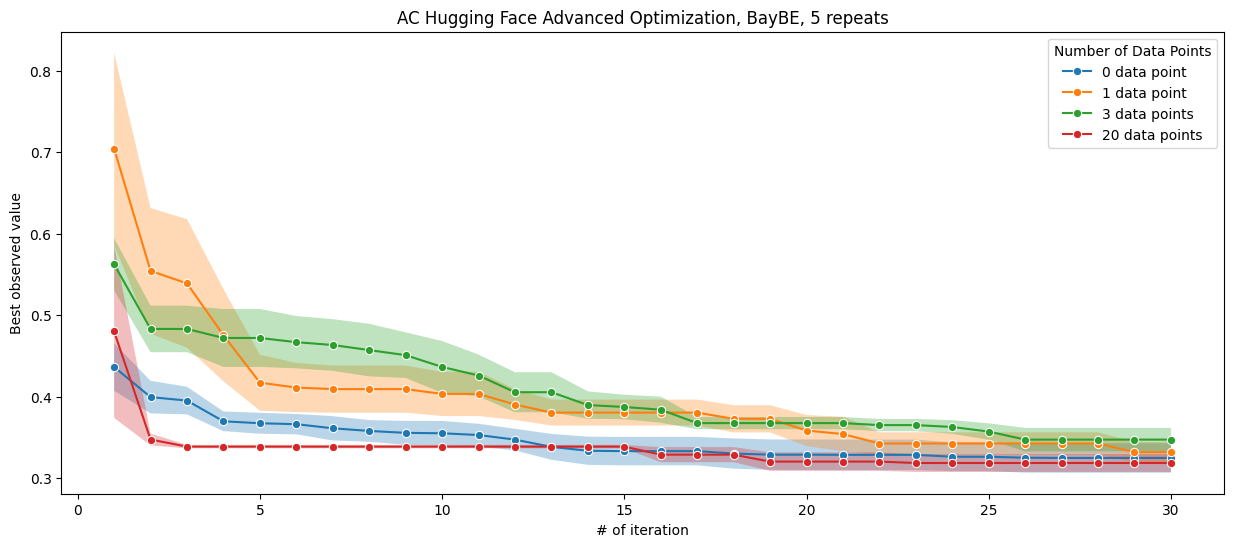

In [6]:
# group the data
data_files = [data0, data1, data3, data20]
labels = ['0 data point', '1 data point', '3 data points', '20 data points']

# Create a figure
plt.figure(figsize=(15, 6))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5) # Standard deviation across the 5 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.title("AC Hugging Face Advanced Optimization, BayBE, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")

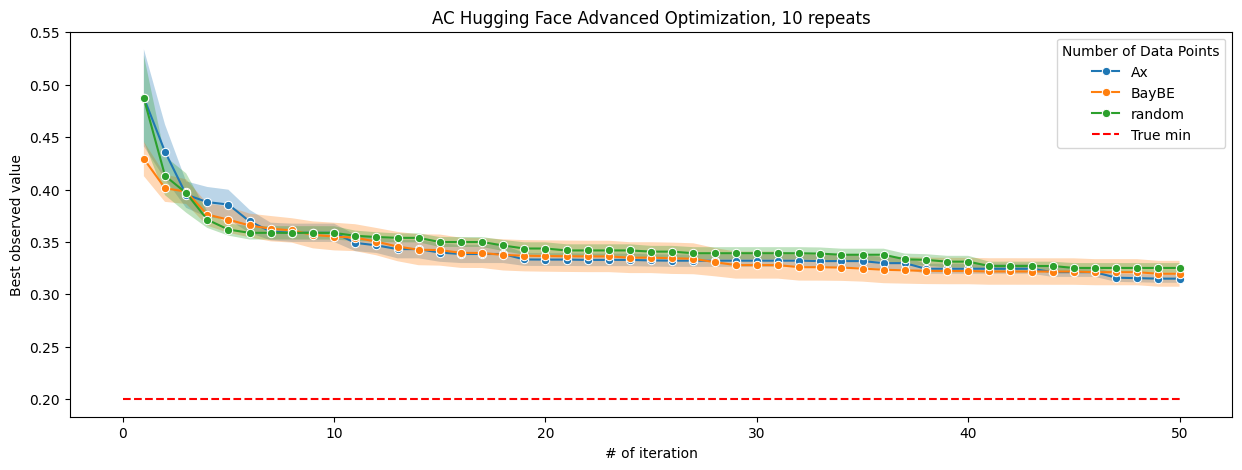

In [40]:
ax_data = np.loadtxt('AdvOpt-Ax.csv')
baybe_data = np.loadtxt('AdvOpt-BayBE.csv')
random_data = np.loadtxt('AdvOpt-random.csv') 

data_files = [ax_data, baybe_data, random_data]
labels = ['Ax', 'BayBE', 'random']

# Create a figure
plt.figure(figsize=(15, 5))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 10 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(10)
      # Standard deviation across the 10 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.hlines(y=0.2, xmin=0, xmax=50, colors='r', ls='--', label = 'True min')  # Actual optimum for this problem
plt.title("AC Hugging Face Advanced Optimization, 10 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")